In [1]:
import pandas as pd
import numpy as np
import random 
from sklearn import decomposition
from sklearn import preprocessing
from matplotlib import pyplot as plt

In [2]:
# generate an array of 100 gene names
genes = ['gene' + str(i) for i in range(1, 101)]

# Now we create arrays of sample names
wt = ['wt' + str(i) for i in range(1, 6)] # 5 wild type or 'wt'
ko = ['ko' + str(i) for i in range(1, 6)] # 5 knock out or 'ko'

data = pd.DataFrame(
    columns = [*wt, *ko],
    index = genes
)
data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
for gene in data.index:
    data.loc[gene, 'wt1' : 'wt5'] = np.random.poisson(lam = random.randrange(10, 100), size = 5)
    data.loc[gene, 'ko1' : 'ko5'] = np.random.poisson(lam = random.randrange(10, 100), size = 5)

data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,52,41,35,62,56,41,26,36,24,27
gene2,63,53,69,62,65,32,36,48,35,24
gene3,74,66,71,63,58,39,45,48,67,61
gene4,83,81,68,80,70,96,85,85,81,70
gene5,94,82,75,88,102,16,12,14,17,9


**Note** 

Genes are variables 

wt and ko are sample

In [4]:
data.T.head()

,gene1,gene2,gene3,gene4,gene5,gene6,gene7,gene8,gene9,gene10,...,gene91,gene92,gene93,gene94,gene95,gene96,gene97,gene98,gene99,gene100
wt1,52,63,74,83,94,90,46,67,21,103,...,27,26,10,25,77,58,55,77,71,9
wt2,41,53,66,81,82,99,41,53,18,95,...,33,19,10,13,88,50,49,67,75,9
wt3,35,69,71,68,75,87,55,67,24,105,...,27,13,13,15,94,42,57,71,83,15
wt4,62,62,63,80,88,91,66,60,24,77,...,30,15,12,15,102,48,53,79,70,17
wt5,56,65,58,70,102,94,44,62,26,65,...,17,15,10,18,90,50,50,70,78,14


In [5]:
scaled_data = preprocessing.scale(data.T)

pca = decomposition.PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
pca_data

array([[ 8.69943812e+00, -3.30874896e+00,  3.57817423e+00,
         2.05787013e+00, -8.47566781e-02, -1.01434837e+00,
        -7.14525032e-01,  1.31009788e+00, -1.67793291e+00,
        -1.55431223e-15],
       [ 8.77109011e+00,  2.21347238e+00, -1.33935264e+00,
        -1.04439729e+00, -1.52303085e+00,  1.62985235e+00,
        -1.98123842e+00, -1.93223218e+00, -1.95479249e+00,
        -2.02615702e-15],
       [ 8.43921166e+00,  2.72147341e+00, -5.73859462e-01,
        -2.14958134e+00,  2.85873953e+00, -2.71300636e+00,
         1.36657308e+00,  1.02334195e-01, -2.86097058e-01,
         5.55111512e-16],
       [ 7.89497769e+00, -3.95555899e-02, -1.46767009e+00,
         2.57079125e+00, -2.50096693e+00, -1.41991560e+00,
         1.04615056e+00, -1.02768839e+00,  2.29907428e+00,
        -1.99840144e-15],
       [ 8.28505001e+00, -1.49734205e+00, -3.27759683e-01,
        -1.32482247e+00,  1.20894036e+00,  3.47549876e+00,
         3.14377953e-01,  1.62270410e+00,  1.77694450e+00,
        -7.

## Scree Plot

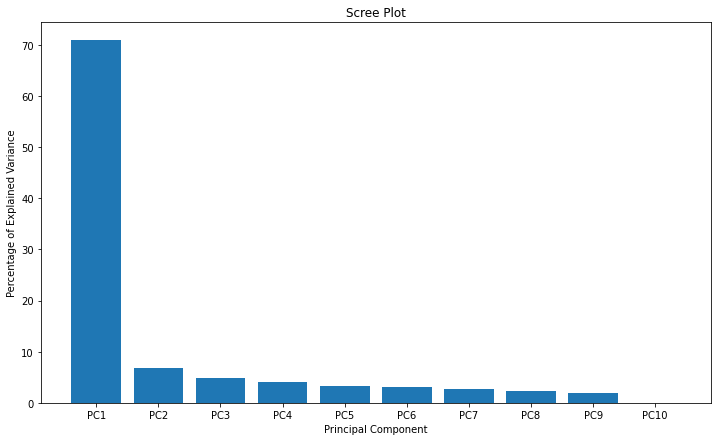

In [6]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals = 1)

labels = ['PC' + str(i) for i in range(1, len(per_var) + 1)]

plt.figure(figsize = (12, 7))
plt.bar(
    x = range(1, len(per_var) + 1),
    height = per_var,
    tick_label = labels
       )
plt.xlabel('Principal Component')
plt.ylabel('Percentage of Explained Variance')
plt.title('Scree Plot')
plt.show()

In [7]:
pca_df = pd.DataFrame(pca_data, index = [*wt, *ko], columns = labels)
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
wt1,8.699438,-3.308749,3.578174,2.057870,-0.084757,-1.014348,-0.714525,1.310098,-1.677933,-1.554312e-15
wt2,8.771090,2.213472,-1.339353,-1.044397,-1.523031,1.629852,-1.981238,-1.932232,-1.954792,-2.026157e-15
wt3,8.439212,2.721473,-0.573859,-2.149581,2.858740,-2.713006,1.366573,0.102334,-0.286097,5.551115e-16
wt4,7.894978,-0.039556,-1.467670,2.570791,-2.500967,-1.419916,1.046151,-1.027688,2.299074,-1.998401e-15
wt5,8.285050,-1.497342,-0.327760,-1.324822,1.208940,3.475499,0.314378,1.622704,1.776945,-7.494005e-16


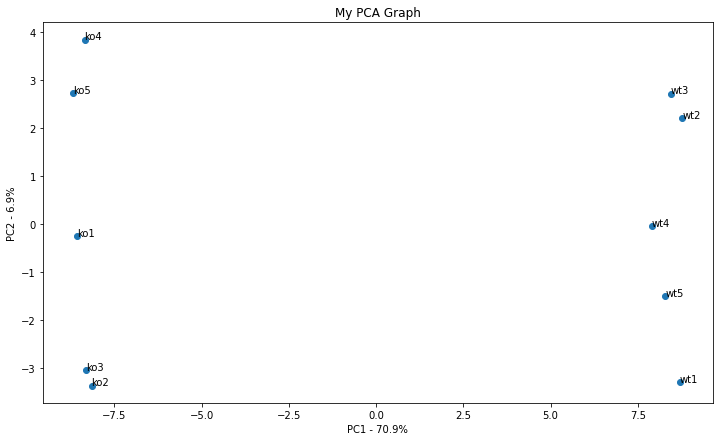

In [8]:
plt.figure(figsize = (12, 7))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(
        sample, 
        (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample])
    )
    
plt.show()

lets look at the loading scores for PC1 determines which genes had a largest influemce on separating the two clusters along x-axis

In [9]:
loading_scores = pd.Series(pca.components_[0], index = genes)

sorted_loading_scores = loading_scores.abs().sort_values(ascending = False)
sorted_loading_scores.head(10)

gene43    0.118197
gene6     0.117844
gene90    0.117488
gene19    0.117466
gene97    0.117439
gene55    0.117360
gene93    0.117127
gene69    0.117047
gene17    0.116881
gene5     0.116621
dtype: float64

In [10]:
from sklearn import datasets

data = datasets.load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [11]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [12]:
Xdata = data['data']
Xdata

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [13]:
target = data['target']
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
species = data['target_names']
species

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [16]:
features = data['feature_names']
features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [17]:
df = pd.DataFrame(Xdata, columns = features)

In [18]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
mean = np.mean(Xdata, axis = 0)
mean

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [20]:
sepalmean = Xdata[:, 0].mean()
sepalmean

5.843333333333334